In [668]:
import os,sys
from dateutil.parser import parse
import numpy as np
from datetime import datetime
import time
from collections import Counter
import pandas as pd

sys.path.append("/Users/maithoma/work/python/")
from tm_python_lib import * 
from fitting_tools import *
from adaptive_kernel_tom import adaptive_kernel_quantile_pdf_tom

%matplotlib inline


sys.path.append("/Users/maithoma/work/github/bountyhunt/jupyter")

try:
    reload(bountylib)
except:
    import bountylib

from bountylib import *

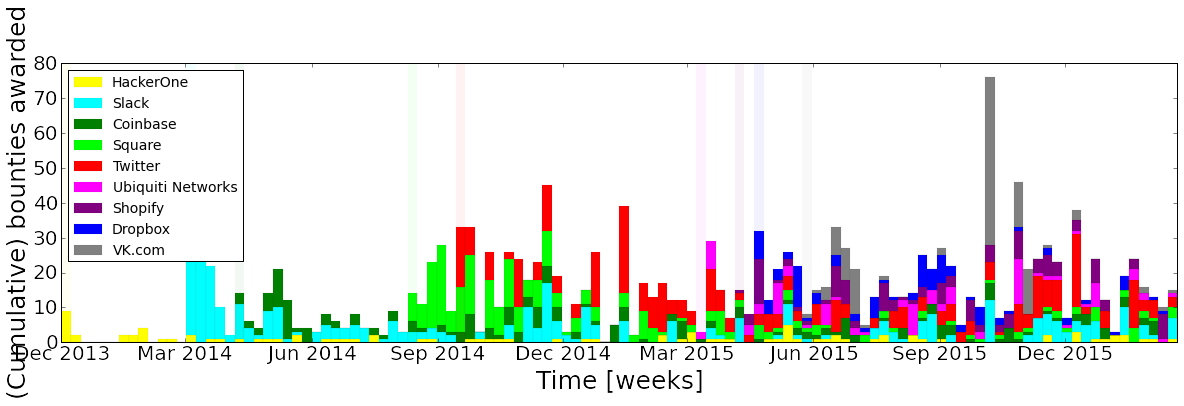

In [634]:
plotTimeline(df)

LinregressResult(slope=-0.3063571118106273, intercept=-0.34916379387969465, rvalue=-0.9305356844195668, pvalue=5.8250732160103766e-12, stderr=0.024609858169666127)


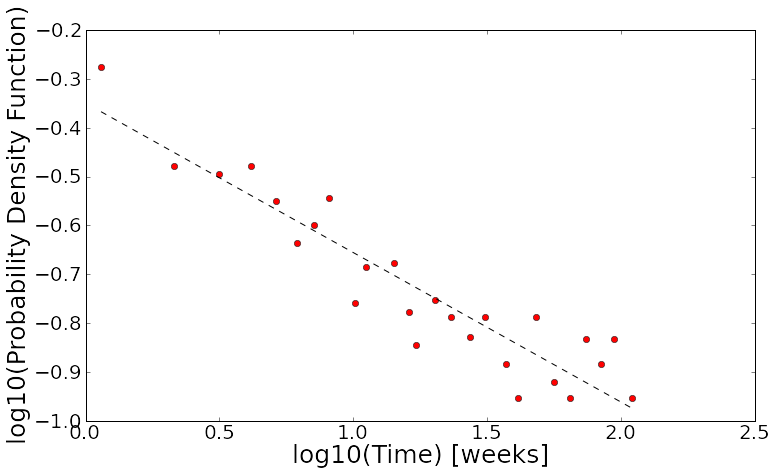

In [669]:
plotDecay(df)

$t^{-0.3} * t^{1.3} = t^{-0.3 + 1.3} = t$

LinregressResult(slope=-0.51293329084223949, intercept=0.010253799893587767, rvalue=-0.98516406374522192, pvalue=3.3210800587338628e-22, stderr=0.017195948076199702)


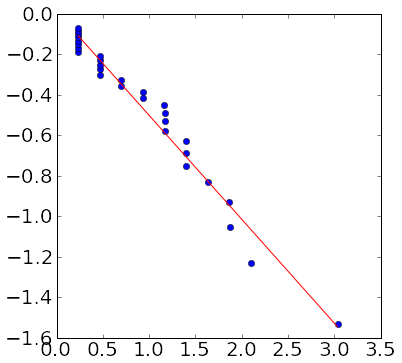

In [402]:
XinitTsp = np.array([time.mktime(t.timetuple()) for t in Xinit])
#print np.diff(XinitTsp/3600/24.)
x,y = rankorder(np.diff(XinitTsp/3600/24./30.))
y = y/float(y[-1])
c = (x>0)*(y>0)
lx = np.log10(x[c])
ly = np.log10(y[c])

fit = S.linregress(x[c],ly)
print fit
pl.plot(x[c],ly,'o')
pl.plot(x[c],x[c]*fit[0]+fit[1],'r-')

LinregressResult(slope=-0.0072177415097544693, intercept=1.363490402949521, rvalue=-0.95136140409324099, pvalue=1.9298118354017214e-18, stderr=0.00040687236766258534)


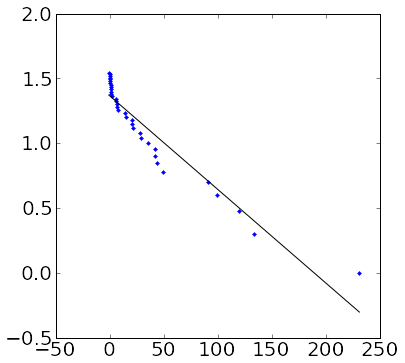

In [293]:
Xdiff = Xdiff + np.random.rand(len(Xdiff)) - 0.5
x,y = rankorder(Xdiff)
c = (x>0)*(y>0)
lx = np.log10(x)
ly = np.log10(y)

fit = S.linregress(x,ly)
print fit
pl.plot(x,ly,'.')
pl.plot(x,x*fit[0]+fit[1],'k-')

### Bounties per Researcher

1.18284557295 0.230940107676 75
1.29204382374 0.251976315339 63
1.04716579745 0.0883021571377 513
1.6122019115 0.0708436346976 797


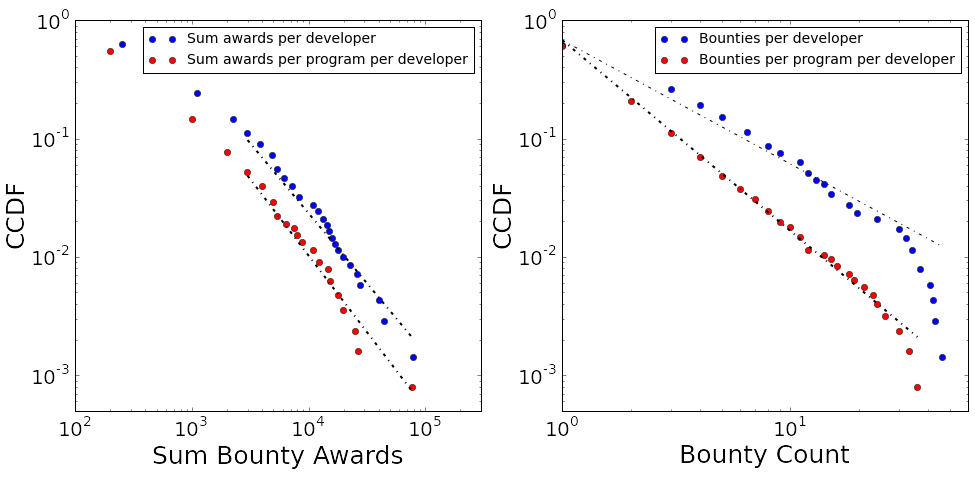

In [544]:
bountyPerResearcher(df)

## Awards as a function of award rank (by researcher)

1.25892541179
LinregressResult(slope=1.2395182027135159, intercept=2.3228106475157437, rvalue=0.99820727047574975, pvalue=2.4832532149811121e-33, stderr=0.014575489839067096)


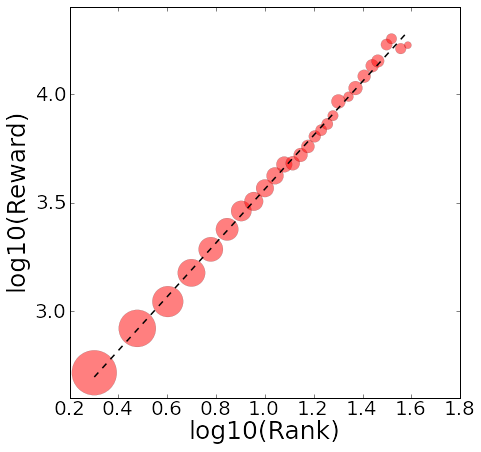

In [900]:
Rewards = []
Ranks = []
diffSubmit = []

for researcher in df.Researcher.unique():
    bTstamp = df[df.Researcher == researcher].timestamp.values
    bDates = df[df.Researcher == researcher].Bounty.index
    bounties = df[df.Researcher == researcher].Bounty.values
    rank = np.arange(1,len(bounties)+1)
    
    Rewards = np.append(Rewards,np.cumsum(bounties))
    Ranks = np.append(Ranks,rank)
    diffSubmit = np.append(diffSubmit,bTstamp)


#'''Waiting Times Between 2 Awards'''    
#pl.figure(1,(7,5))
#x,y = rankorder(np.diff(diffSubmit)/3600./24.)
#pl.semilogy(x,y,'.')
#pl.xlabel("delta time between 2 awards [days]")
#pl.ylabel("rank-ordering")

'''
pl.figure(2,(7,5))
avgtype = "mean"

c = Ranks < 33
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(lx,ly,30)
B = binning(Ranks[c],ly,50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

#pl.semilogy(B['bins'],B[avgtype],'ro')
#pl.semilogy(B['bins'],B['bins']*fit[0]+fit[1],'r-')


c = (Ranks >= 33)*(Ranks < 60)
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(Ranks[c],ly,30)
B = binning(Ranks[c],ly,30)
#B = binning(Ranks[c],Rewards[c],50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-.',lw=1.5)

#pl.semilogy(B['bins'],B[avgtype],'ro')
#pl.semilogy(B['bins'],B['bins']*fit[0]+fit[1],'r-')

pl.xlim(xmin=-5)
pl.ylim(ymin=2)
pl.xlabel("Rank")
pl.ylabel("log10(Reward)")
'''

pl.figure(3,(7,7))
avgtype = "mean"

xmin = 10**0.1
print xmin
c = (Ranks >= xmin)*(Ranks < 10**1.6)
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(lx,ly,50)
#B = binning(Ranks[c],ly,50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)
#pl.xlim(xmin=-5)
#pl.ylim(ymin=2)
pl.xlabel("log10(Rank)")
pl.ylabel("log10(Reward)")

pl.savefig(figuredir + "scaling_SumRewards_Researchers_All.eps")

In [901]:
0.998**2

0.996004

## Awards as a function of award rank (by program)

LinregressResult(slope=1.266705387068801, intercept=2.0816607588231477, rvalue=0.99738402984585151, pvalue=1.5650621151561185e-41, stderr=0.015517664726954842)


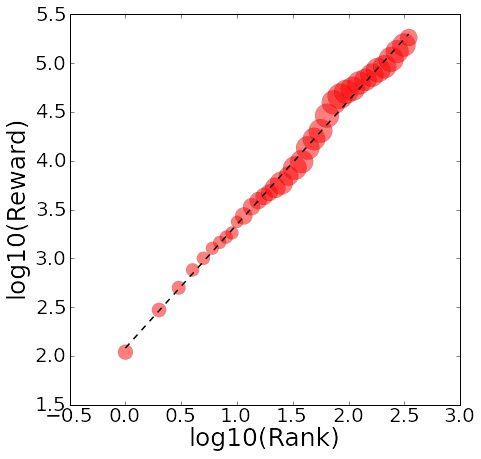

In [894]:
Rewards = []
Ranks = []
diffSubmit = []

for program in df.Program.unique():
    bTstamp = df[df.Program == program].timestamp.values
    bDates = df[df.Program == program].Bounty.index
    bounties = df[df.Program == program].Bounty.values
    rank = np.arange(1,len(bounties)+1)
    
    Rewards = np.append(Rewards,np.cumsum(bounties))
    Ranks = np.append(Ranks,rank)
    diffSubmit = np.append(diffSubmit,bTstamp)

    
    
#'''Waiting Times Between 2 Awards'''  
#pl.figure(1,(10,7))
#x,y = rankorder(np.diff(diffSubmit)/3600./24.)
#x[x < 1] = 1
#pl.loglog(x,y,'.')
#x = x + np.random.rand(len(y)) - 0.5
#print "fit power law: ",pwlaw_fit_cont(x,20),np.max(x)
#pl.xlabel("Time between 2 awards [days]")
#pl.ylabel("Rank Ordering")

'''
pl.figure(2,(7,5))
avgtype = "mean"

c = Ranks < 75
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(lx,ly,30)
B = binning(Ranks[c],ly,50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

c = (Ranks >= 75)*(Ranks < 400)
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(lx,ly,30)
B = binning(Ranks[c],ly,50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-.',lw=1.5)

pl.xlabel("Rank")
pl.ylabel("log10(Reward)")
'''

pl.figure(3,(7,7))
c = Ranks < 10000
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
B = binning(lx,ly,50)
fit = S.linregress(B['bins'],B[avgtype])
print fit
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)
pl.xlabel("log10(Rank)")
pl.ylabel("log10(Reward)")

fit power law:  (1.4843488432077188, 0.1889822365046136, 112) 357.198451873


(5.0911218673314407, 14.51704333247241)

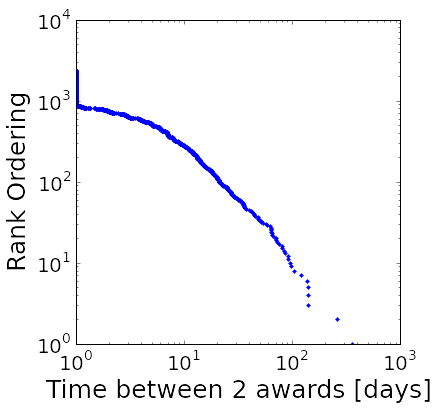

In [878]:
x,y = rankorder(np.diff(diffSubmit)/3600./24.)
x[x < 1] = 1
pl.loglog(x,y,'.')
x = x + np.random.rand(len(y)) - 0.5
print "fit power law: ",pwlaw_fit_cont(x,20),np.max(x)
pl.xlabel("Time between 2 awards [days]")
pl.ylabel("Rank Ordering")

np.mean(x),np.std(x)

In [842]:
def RankRewards(df,program):

    dfprog = df[df.Program == program]
  
    bTstamp = dfprog.timestamp.values
    bDates = dfprog.Bounty.index
    bounties = dfprog.Bounty.values
    rank = np.arange(1,len(bounties)+1)
    return {'ranks':rank,'rewards':np.cumsum(bounties),'deltaAward':bTstamp}


def RankRewardsResearchers(df,program):

    dfprog = df[df.Program == program]
    
    Rewards = []
    Ranks = []
    diffSubmit = []

    for researcher in dfprog.Researcher.unique():
        bTstamp = dfprog[df.Researcher == researcher].timestamp.values
        bDates = dfprog[df.Researcher == researcher].Bounty.index
        bounties = dfprog[df.Researcher == researcher].Bounty.values
        rank = np.arange(1,len(bounties)+1)

        Rewards = np.append(Rewards,np.cumsum(bounties))
        Ranks = np.append(Ranks,rank)
        diffSubmit = np.append(diffSubmit,bTstamp)
    
    return {'ranks':Ranks,'rewards':Rewards,'deltaAward':diffSubmit}


## Awards as a function of award rank (by program)

158.489319246
LinregressResult(slope=1.2764058302818753, intercept=2.2857184078022703, rvalue=0.99031009548906401, pvalue=1.2654425635075966e-18, stderr=0.040024203374272704)


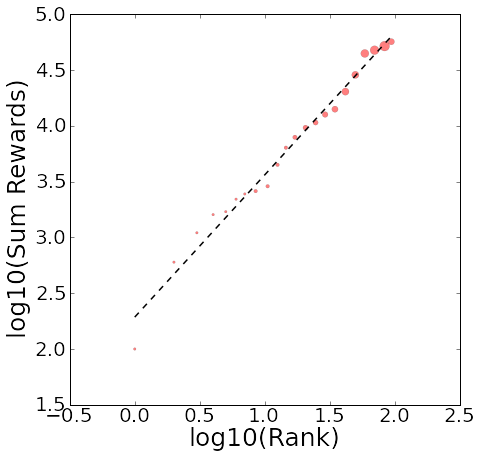

In [895]:
dic = RankRewards(df,'Ubiquiti Networks')
avgtype = "mean"

Ranks = dic['ranks']
Rewards = dic['rewards']
c = Ranks < 10**5.2
print 10**2.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(Ranks[c],Rewards[c],30)
B = binning(lx,ly,30)

pl.figure(1,(7,7))

fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

pl.xlabel("log10(Rank)")
pl.ylabel("log10(Sum Rewards)")


## Awards as a function of award rank (by program by researcher)

158.489319246
LinregressResult(slope=1.3462454982593026, intercept=2.4417036965302104, rvalue=0.99465341681979025, pvalue=3.4708032517794232e-10, stderr=0.046591116404460918)


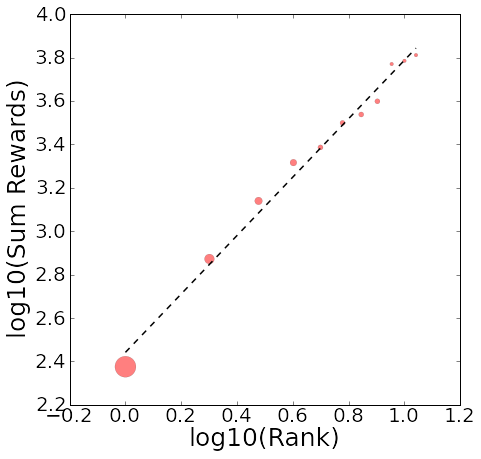

In [896]:
pl.figure(3,(7,7))

dic = RankRewardsResearchers(df,'VK.com')



avgtype = "mean"

Ranks = dic['ranks']
Rewards = dic['rewards']
c = Ranks < 10**2.2
print 10**2.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(lx,ly,30)
B = binning(lx,ly,100)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

pl.xlabel("log10(Rank)")
pl.ylabel("log10(Sum Rewards)")

LinregressResult(slope=1.270349362265667, intercept=2.075235941246357, rvalue=0.99626416353977887, pvalue=1.3290703686465626e-66, stderr=0.014098947103078652)


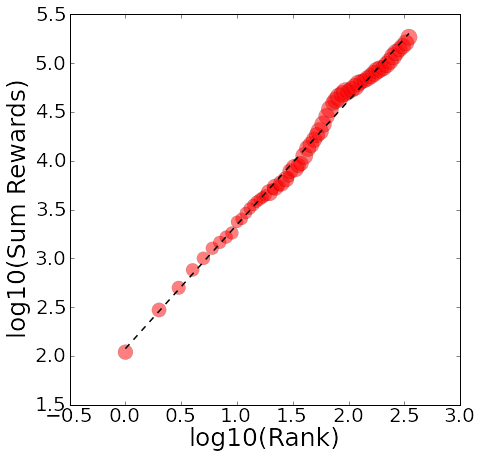

In [897]:
pl.figure(3,(7,7))

Ranks = []
Rewards = []

for program in df.Program.unique():
    dic = RankRewards(df,program)
    Ranks = np.append(Ranks,dic['ranks'])
    Rewards = np.append(Rewards,dic['rewards'])

c = Ranks < 10**5.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(lx,ly,30)
B = binning(lx,ly,100)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

pl.xlabel("log10(Rank)")
pl.ylabel("log10(Sum Rewards)")

pl.savefig(figuredir + "scaling_SumRewards_Programs_All.eps")

LinregressResult(slope=1.4011266204153068, intercept=2.3074214795498174, rvalue=0.99436000492912413, pvalue=9.6508688680100786e-34, stderr=0.026014645189795852)


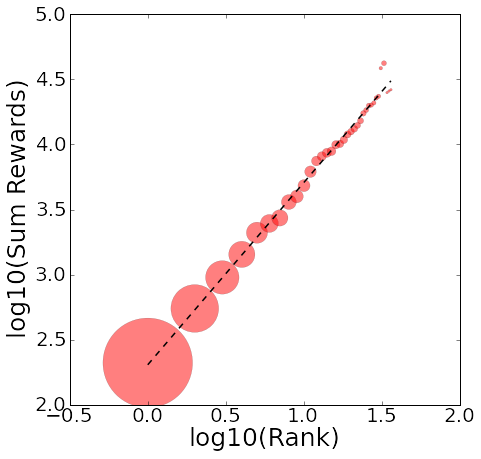

In [899]:
pl.figure(3,(7,7))

Ranks = []
Rewards = []

for program in df.Program.unique():
    dic = RankRewardsResearchers(df,program)
    Ranks = np.append(Ranks,dic['ranks'])
    Rewards = np.append(Rewards,dic['rewards'])

c = Ranks < 10**5.2
lx = np.log10(Ranks[c])
ly = np.log10(Rewards[c])
#B = binning(lx,ly,30)
B = binning(lx,ly,100)
fit = S.linregress(B['bins'],B[avgtype])
print fit
#pl.semilogy(Ranks,Rewards,'.')
#pl.plot(B['bins'],B[avgtype],'ro')
pl.scatter(B['bins'],B[avgtype],s=5*B['nPoints'],alpha=0.5,color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k--',lw=1.5)

pl.xlabel("log10(Rank)")
pl.ylabel("log10(Sum Rewards)")

pl.savefig(figuredir + "scaling_SumRewards_Programs_Researchers_All.eps")